In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
from sklearn.linear_model import LogisticRegression


In [75]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [76]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## EDA - Heatmap and Density Plot

In [78]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [79]:
titanic.isnull().sum()['age'] / titanic.shape[0]

0.19865319865319866

In [80]:
titanic.isnull().sum()['deck'] / titanic.shape[0]

0.7721661054994389

<Axes: >

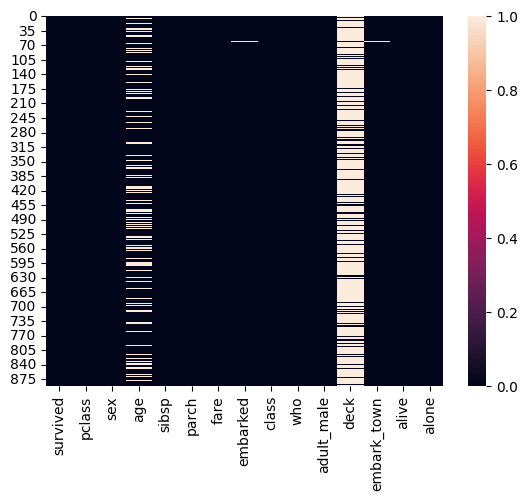

In [81]:
sns.heatmap(titanic.isnull())

<Axes: >

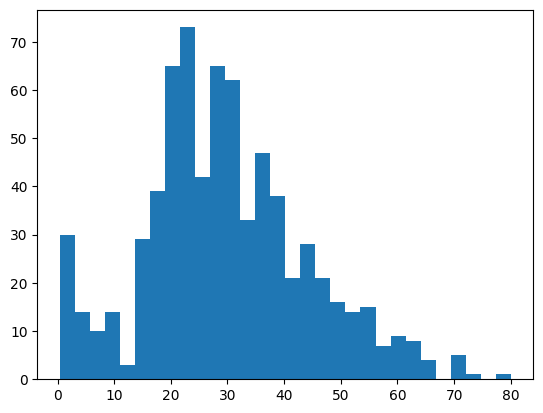

In [82]:
titanic['age'].hist(bins=30, grid=False)

<Axes: ylabel='Density'>

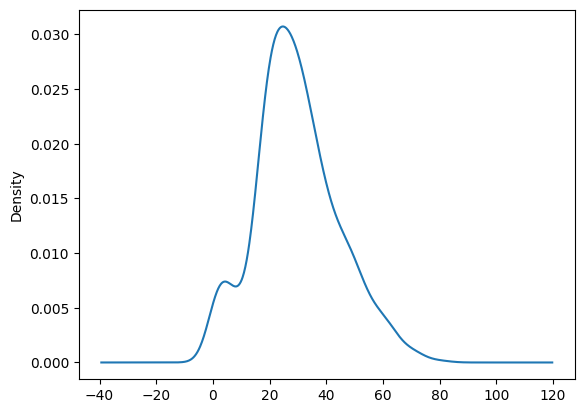

In [83]:
titanic['age'].plot(kind='density')

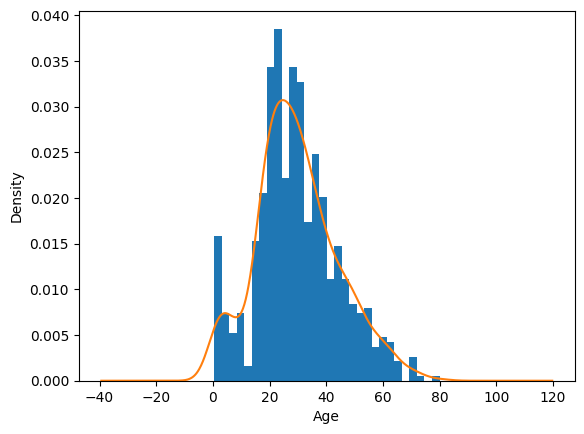

In [84]:
ax = titanic['age'].hist(bins=30, grid=False, density=True)
titanic['age'].plot(kind='density')
ax.set_xlabel('Age')
plt.show()

### Missing age imputation

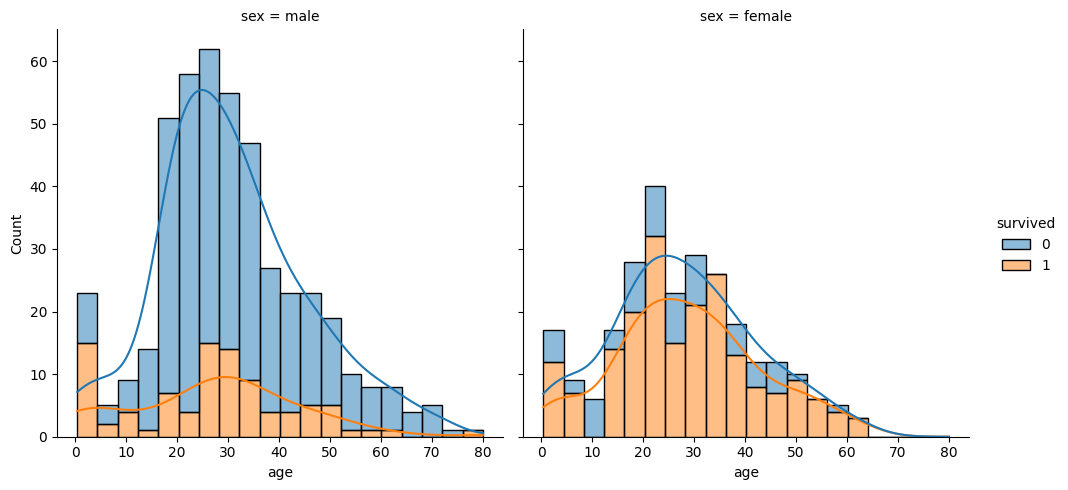

In [85]:
sns.displot(data=titanic, x='age', kde=True, bins=20, hue='survived', multiple='stack', col='sex')

In [86]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [87]:
titanic[titanic['survived']==1]['sex'].value_counts()

sex
female    233
male      109
Name: count, dtype: int64

In [88]:
233/314, 109/577

(0.7420382165605095, 0.18890814558058924)

In [89]:
titanic['age'].mean()

29.69911764705882

In [90]:
titanic[titanic['sex']=='male']['age'].mean()

30.72664459161148

In [91]:
titanic[titanic['sex']=='female']['age'].mean()

27.915708812260537

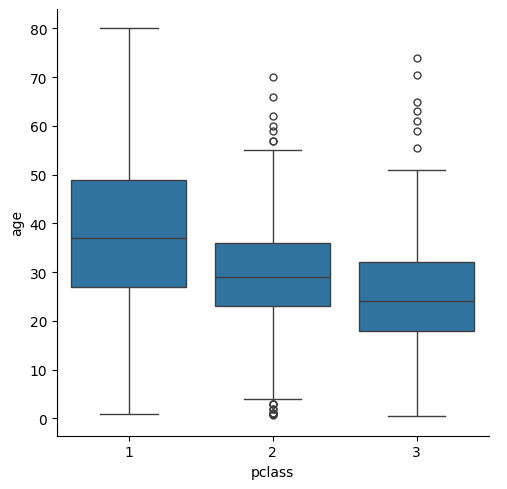

In [92]:
sns.catplot(x='pclass', y='age', data = titanic, kind='box')

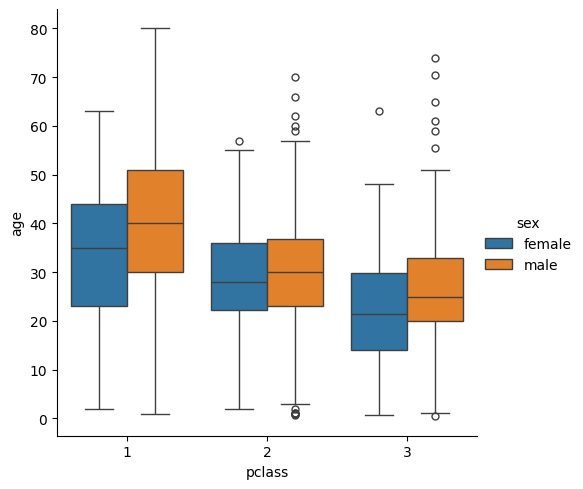

In [93]:
sns.catplot(x='pclass', y='age', data = titanic, kind='box', hue='sex')

In [94]:
def impute_age(pclass, sex):
    if sex=='male':
        if pclass==1:
            return titanic[(titanic['pclass']==1)&(titanic['sex']=='male')]['age'].mean()
        elif pclass==2:
            return titanic[(titanic['pclass']==2)&(titanic['sex']=='male')]['age'].mean()
        elif pclass==3:
            return titanic[(titanic['pclass']==3)&(titanic['sex']=='male')]['age'].mean()
        
    else:
        if pclass==1:
            return titanic[(titanic['pclass']==1)&(titanic['sex']!='male')]['age'].mean()
        elif pclass==2:
            return titanic[(titanic['pclass']==2)&(titanic['sex']!='male')]['age'].mean()
        elif pclass==3:
            return titanic[(titanic['pclass']==3)&(titanic['sex']!='male')]['age'].mean() 

In [95]:
titanic['age'] = titanic.apply(lambda x: impute_age(x['pclass'], x['sex']) if np.isnan(x['age']) else x['age'], axis=1)

In [96]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Analyzing Embarked town

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


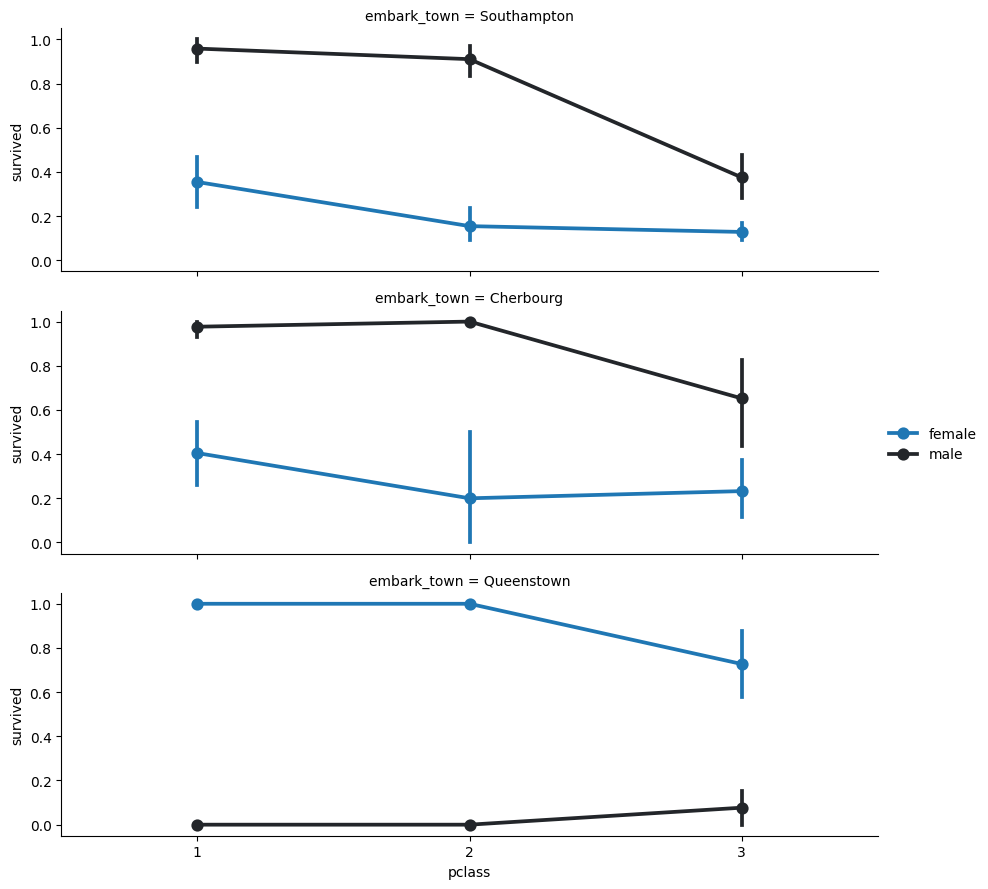

In [97]:
f = sns.FacetGrid(titanic, row='embark_town', height=3, 
                  aspect=3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', 
      order = None, hue_order=None)
f.add_legend()

In [98]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [99]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [100]:
titanic['embark_town'].fillna('Southampton', inplace=True)

/var/folders/b1/06nddx952f1g_2r63y2n569c0000gn/T/ipykernel_62535/3096507647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embark_town'].fillna('Southampton', inplace=True)


In [101]:
titanic['embark_town'].isnull().sum()

0

In [102]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [103]:
titanic['embarked'].fillna('S', inplace=True)

/var/folders/b1/06nddx952f1g_2r63y2n569c0000gn/T/ipykernel_62535/3912997942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna('S', inplace=True)


In [104]:
titanic['embarked'].isnull().sum()

0

In [105]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [106]:
titanic.drop(['deck', 'embark_town', 'alive'], inplace=True, axis=1)

In [107]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [108]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 71.5+ KB


## Data Types Correction and Mapping

In [109]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 71.5+ KB


In [110]:
titanic['age'] = titanic['age'].astype(int)


In [111]:
genders = {'male':0, 'female':1}
titanic['sex'] = titanic['sex'].map(genders)

In [112]:
titanic['adult_male'] = titanic['adult_male'].map({True:1, False:0})

In [113]:
titanic['alone'] = titanic['alone'].map({True:1, False:0})

## One hot encoding

In [114]:
titanic = pd.get_dummies(titanic, columns=['embarked', 'who'] , dtype=int)

In [115]:
titanic.drop(['embarked_S','who_woman'], axis=1, inplace=True)

In [116]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    int64  
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   class       891 non-null    object 
 8   adult_male  891 non-null    int64  
 9   alone       891 non-null    int64  
 10  embarked_C  891 non-null    int64  
 11  embarked_Q  891 non-null    int64  
 12  who_child   891 non-null    int64  
 13  who_man     891 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 97.6+ KB


In [117]:
titanic = pd.get_dummies(titanic, columns=['pclass'] , dtype=int).drop(['pclass_3'], axis=1)

In [118]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    int64  
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   class       891 non-null    object 
 7   adult_male  891 non-null    int64  
 8   alone       891 non-null    int64  
 9   embarked_C  891 non-null    int64  
 10  embarked_Q  891 non-null    int64  
 11  who_child   891 non-null    int64  
 12  who_man     891 non-null    int64  
 13  pclass_1    891 non-null    int64  
 14  pclass_2    891 non-null    int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 104.5+ KB


In [119]:
titanic.drop(['class'], axis=1, inplace=True)

## Building Logistic Regression Model

In [120]:
input_cols = list(titanic.columns[1:])
target_col = 'survived'

In [121]:
X = titanic[input_cols]
y = titanic[target_col]

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 13), (179, 13), (712,), (179,))

In [126]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
y_predict = model.predict(X_test)

In [128]:
model.score(X_test, y_test)

0.8100558659217877

## Feature Selection | Recursive Feature Elimination

In [129]:
from sklearn.feature_selection import RFE

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5, verbose=1)
rfe.fit(X_train, y_train)

# model.fit(X_train, y_train)
# model.score(X_test, y_test)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5,
    verbose=1)

In [132]:
rfe.support_

array([False, False, False, False, False,  True, False,  True, False,
       False,  True,  True,  True])

In [133]:
X_train.columns[rfe.support_]

Index(['adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2'], dtype='object')

In [134]:
def find_best_feature(n):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=1000)
    rfe = RFE(model, n_features_to_select=n, verbose=0)
    rfe = rfe.fit(X_train, y_train)
    selected_col = X_train.columns[rfe.support_]

    model.fit(X_train[selected_col], y_train)
    score = model.score(X_test[selected_col], y_test)
    print("Selected columns: ", list(selected_col))
    print(n, score)
    print("----------------------\n")

In [135]:
for i in range(X.shape[1]-1):
    find_best_feature(i+1)

Selected columns:  ['who_man']
1 0.7947761194029851
----------------------

Selected columns:  ['who_man', 'pclass_1']
2 0.7947761194029851
----------------------

Selected columns:  ['adult_male', 'who_man', 'pclass_1']
3 0.7947761194029851
----------------------

Selected columns:  ['adult_male', 'who_man', 'pclass_1', 'pclass_2']
4 0.7947761194029851
----------------------

Selected columns:  ['adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
5 0.7947761194029851
----------------------

Selected columns:  ['sibsp', 'adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
6 0.8246268656716418
----------------------

Selected columns:  ['sibsp', 'adult_male', 'alone', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
7 0.8097014925373134
----------------------

Selected columns:  ['sibsp', 'parch', 'adult_male', 'alone', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
8 0.8283582089552238
----------------------

Selected columns:  ['sibsp', 'parch', 'adult_male', 'a